# 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 임낙현

## 0. 필요한 패키지 및 데이터 불러오기

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# df = pd.read_csv('output/daegu.csv', encoding = 'cp949')

In [13]:
df_final=pd.read_csv('output/daegu_final.csv')
# df_final.head()

## 1. 데이터 확인 및 전처리

### 1. 결측치 확인

In [14]:
# df_final 데이터 확인

df_final.head()

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608


In [15]:
# 상대습도의 결측치인 -1, -50, 0 의 개수들을 세어봄

humidity=df_final.loc[:,'humidity']

print(humidity.loc[humidity==-1].count())
print(humidity.loc[humidity==-50].count())
print(humidity.loc[humidity==0].count())

0
0
2


In [16]:
# 온도의 결측치인 -1, -50, 0 의 개수들을 세어봄

temp=df_final.loc[:,'temp']

print(temp.loc[temp==-1].count())
print(temp.loc[temp==-50].count())
print(temp.loc[temp==0].count())

32473
0
61851


In [17]:
# 상대습도의 결측치들 -1, -50, 0 을 NaN으로 변경

# humidity_1=humidity.replace(-1,np.nan)
# humidity_2=humidity_1.replace(-50,np.nan)
# humidity_pre=humidity_2.replace(0,np.nan)

# print(humidity_pre.loc[humidity==-1].count())
# print(humidity_pre.loc[humidity==-50].count())
# print(humidity_pre.loc[humidity==0].count())

In [18]:
# 온도의 결측치들 -1, -50 을 NaN으로 변경

# temp_1=temp.replace(-1,np.nan)
# temp_pre=temp_1.replace(-50,np.nan)

# print(temp_pre.loc[temp_pre==-1].count())
# print(temp_pre.loc[temp_pre==-50].count())

### 2. 결측치가 처리된 데이터프레임을 합침

In [19]:
# 온도와 상대습도 Series들을 합쳐서 데이터프레임으로 만듦

# tem_pre=pd.concat([temp,humidity],axis=1)
# tem_hum.head()

In [20]:
# 날짜와 지역 상대습도와 온도 열지수만 있는 데이터프레임을 만듦

temp_pre=df_final.loc[:,['year','month','day','hour','region','humidity','temp','HI']]

# 온도와 상대습도를 합친 데이터프레임과 날짜와 지역이 있는 데이터프레임을 합침

# temp_mv=pd.concat([df_nh,tem_hum],axis=1)

# 온도를 소수점 아래 둘째자리에서 반올림 한 것으로 만듦

# temp_mv['temp']=round(temp_mv['temp'],2)
# temp_mv.head() # 데이터 확인

### 3. 결측치 처리

In [21]:
# 3월과 11월 사이에 -8.1 이라는 온도의 결측치가 3개 존재한다.

# index=list(temp_mv[(temp_mv['temp']==-8.1)&(temp_mv['month']>=3)&(temp_mv['month']<=11)].index)
# temp_mv.loc[index,:].count()

In [22]:
# 위에서 만든 데이터프레임에서 달이 3이상 11이하인 곳에있는 온도 0과 -8.1을 결측치로 대체함

# index=list(temp_mv[(temp_mv['month']>=3)&(temp_mv['month']<=11)&((temp_mv['temp']==0)|(temp_mv['temp']==-8.1))].index)
# temp_mv.loc[index,'temp']=np.nan

# 위에서 대체한 결측치들을 forward방향으로 linear하게 대체해 줌

# temp_fin=temp_mv.interpolate(method='linear',limit_direction='forward')

In [23]:
# 상대습도의 값들이 어떤것이 있나 확인

# temp_fin['humidity'].unique()

In [24]:
# 결측치가 대체되어서 모든 column에서 false로 나오는지 확인해 봄

temp_pre.isna().any()

year        False
month       False
day         False
hour        False
region      False
humidity    False
temp        False
HI          False
dtype: bool

### 4. 열지수(Heat Index: 이하 HI) column 생성 및 마무리

In [25]:
# 위에서 만든 온도와 상대습도의 결측치가 대체된 데이터프레임에서 열지수(체감온도) column을 생성한다.

# df5 = temp_mv[:]

# df5['temp_F'] = df5['temp'] * 1.8 + 32

# df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['humidity'] + .00085282*df5['temp_F']*df5['humidity']*df5['humidity'] - .00000199*df5['temp_F']*df5['temp_F']*df5['humidity']*df5['humidity']

# index = list(df5[(df5['humidity'] <= 13) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 112)].index)
# df5.loc[index,'HI'] = df5.loc[index,'HI'] - ((13 - df5.loc[index,'humidity']) / 4) * ((17 - abs(df5.loc[index,'temp_F'] - 95)) / 17) ** 0.5

# index = list(df5[(df5['humidity'] > 85) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 87)].index)
# df5.loc[index,'HI'] = df5.loc[index,'HI'] + 0.02 * (df5.loc[index,'humidity'] - 85) * (87 - df5.loc[index,'temp_F'])

# df5['A'] = -10.3 + 1.1 * df5['temp_F'] + 0.047 * df5['humidity']
# index = list(df5.loc[df5['A'] < 79].index)
# df5.loc[index,'HI'] = df5.loc[index,'A']

# index = list(df5.loc[df5['temp_F'] < 40].index)
# df5.loc[index,'HI'] = df5.loc[index,'temp_F']

# df5.drop(columns = ['A'], axis=1, inplace=True)
# df5.drop(columns = 'temp_F', axis=1, inplace=True)
# df5['HI'] = (df5['HI'] - 32) / 1.8
# df5

In [26]:
# 열수치를 만들며 df5가 되었던 데이터프레임을 아래에 사용하기 위한 temp_pre로 바꾸어준다.

# temp_pre=df5[:]

# 몇년도 부터 몇년도 까지의 데이터가 있는지 확인

temp_pre['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

## 2. 겨울과 여름 비교 그래프

### 1. X년도의 겨울, (X+1)년도의 여름 평균기온의 그래프

In [27]:
# 앞으로 많이 쓰일 코드를 짤막하게 치환해놓음
mo=temp_pre['month']
ye=temp_pre['year']

In [28]:
# 겨울의 매년 월평균 기온들을 리스트로 만들어주는 함수
def winter(y):
    wt1=temp_pre.loc[(mo==12)&(ye==y),:]
    wt2=temp_pre.loc[(mo==1)&(ye==y+1),:]
    wt3=temp_pre.loc[(mo==2)&(ye==y+1),:]

    winter1=[]
    for i in range(1,32):
        a=wt1.loc[(wt1['day']==i),:]
        b=a['temp'].mean()
        winter1.append(round(b,2))

    winter2=[]
    for i in range(1,32):
        a=wt2.loc[(wt2['day']==i),:]
        b=a['temp'].mean()
        winter2.append(round(b,2))

    winter3=[]
    for i in range(1,29):
        a=wt3.loc[(wt3['day']==i),:]
        b=a['temp'].mean()
        winter3.append(round(b,2))

    return winter1+winter2+winter3

In [29]:
# 여름의 매년 월평균 기온들을 리스트로 만들어주는 함수
def summer(y):
    sm1=temp_pre.loc[(mo==6)&(ye==y),:]
    sm2=temp_pre.loc[(mo==7)&(ye==y),:]
    sm3=temp_pre.loc[(mo==8)&(ye==y),:]

    summer1=[]
    for i in range(3,31):
        a=sm1.loc[(sm1['day']==i),:]
        b=a['temp'].mean()
        summer1.append(round(b,2))

    summer2=[]
    for i in range(1,32):
        a=sm2.loc[(sm2['day']==i),:]
        b=a['temp'].mean()
        summer2.append(round(b,2))

    summer3=[]
    for i in range(1,32):
        a=sm3.loc[(sm3['day']==i),:]
        b=a['temp'].mean()
        summer3.append(round(b,2))

    return summer1+summer2+summer3

In [30]:
# 여름과 겨울의 매년 월평균 기온을 받아서 한 그래프 위에 그려주고 이미지로 저장해주는 함수
def win_sum_graph(y1,y2):
    xs=list(range(1,91))
    ys_winter=winter(y1)
    ys_summer=summer(y2)


    plt.figure(figsize=(55,8)) #그래프 크기 지정

    plt.plot(xs,ys_winter,'o-',ms=3,lw=1,label=str(y1)+'winter')
    plt.plot(xs,ys_summer,'o-',ms=3,lw=1,label=str(y2)+'summer')
    plt.xlabel('Date') #그래프 x축 이름(label) 지정 
    plt.ylabel('Temp')
    plt.ylim(-15,35)
    plt.legend()

    for i in range(len(xs)):
        height=ys_summer[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)
    for i in range(len(xs)):
        height=ys_winter[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)


    plt.savefig(str(y1)+'년도 겨울 및 '+str(y2)+'년도 여름의 평균온도')

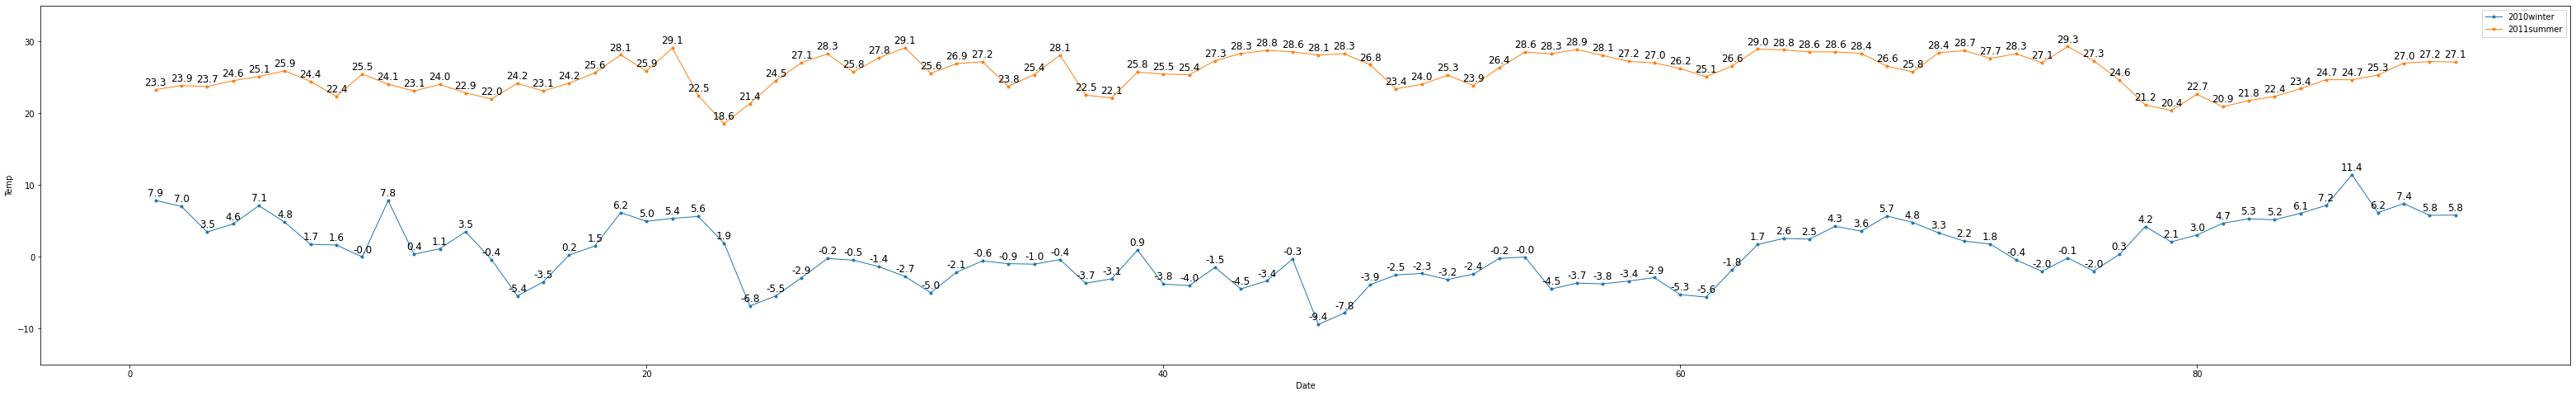

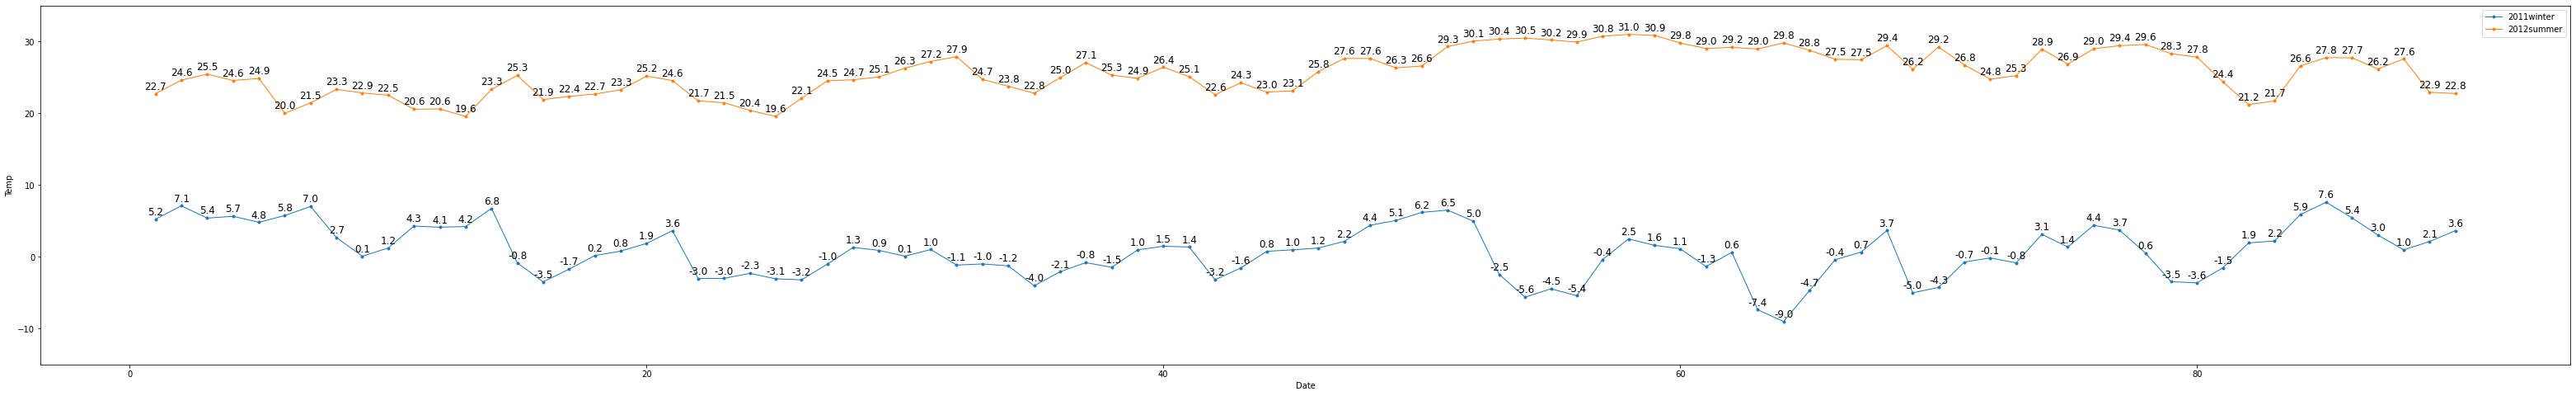

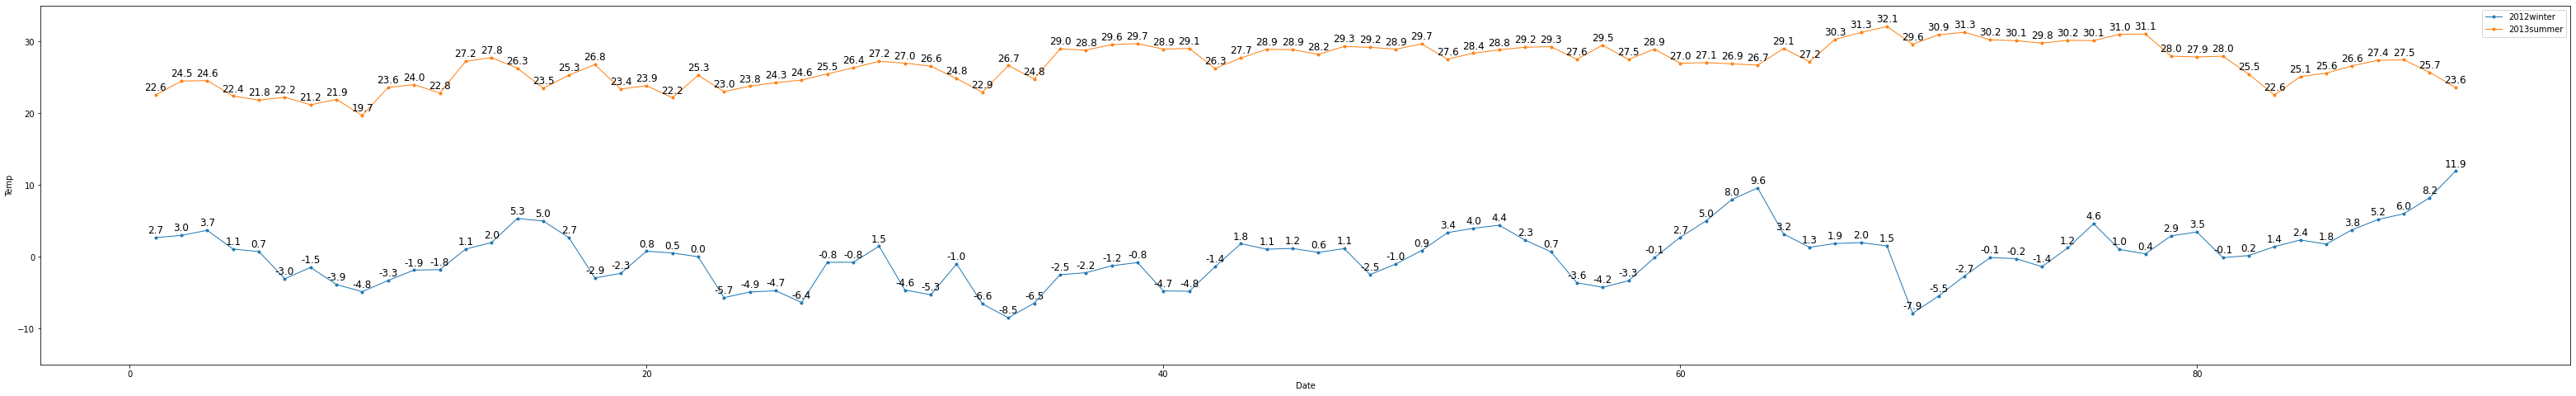

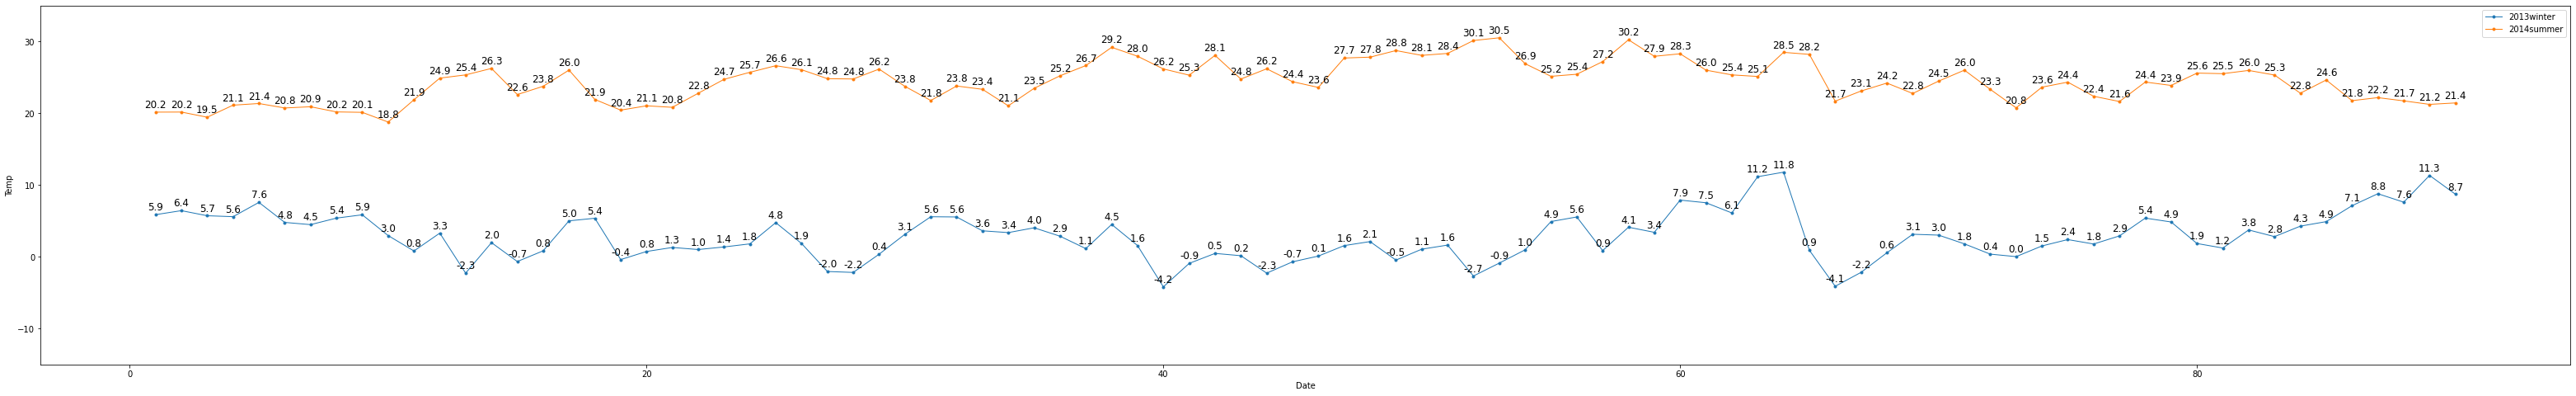

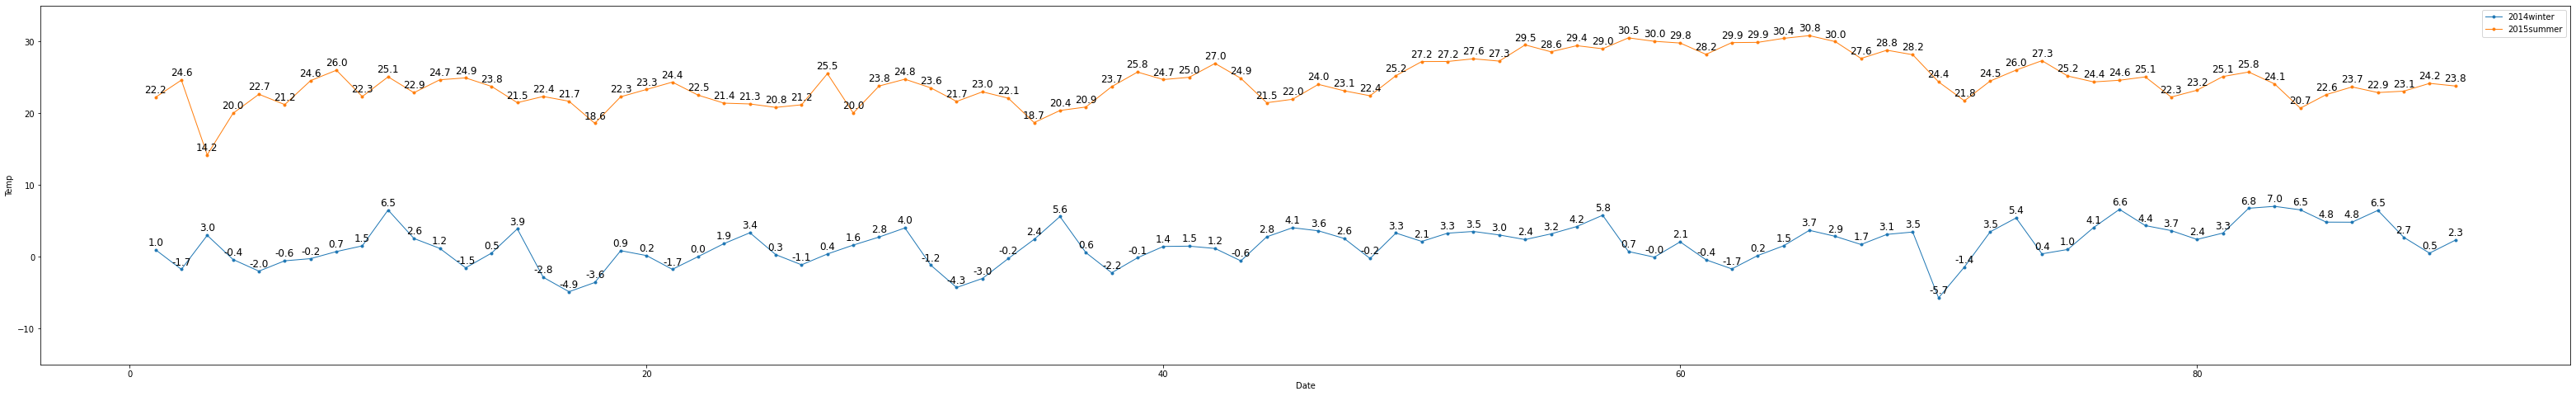

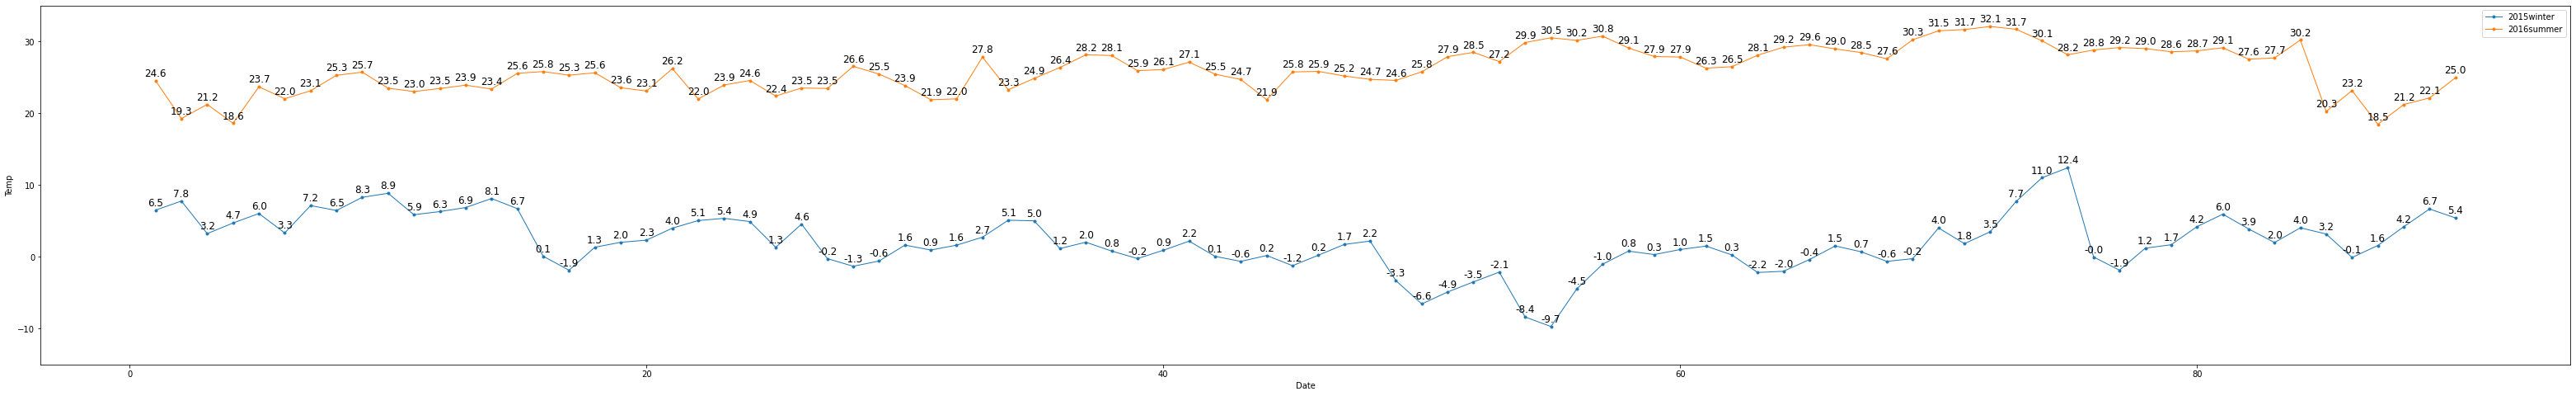

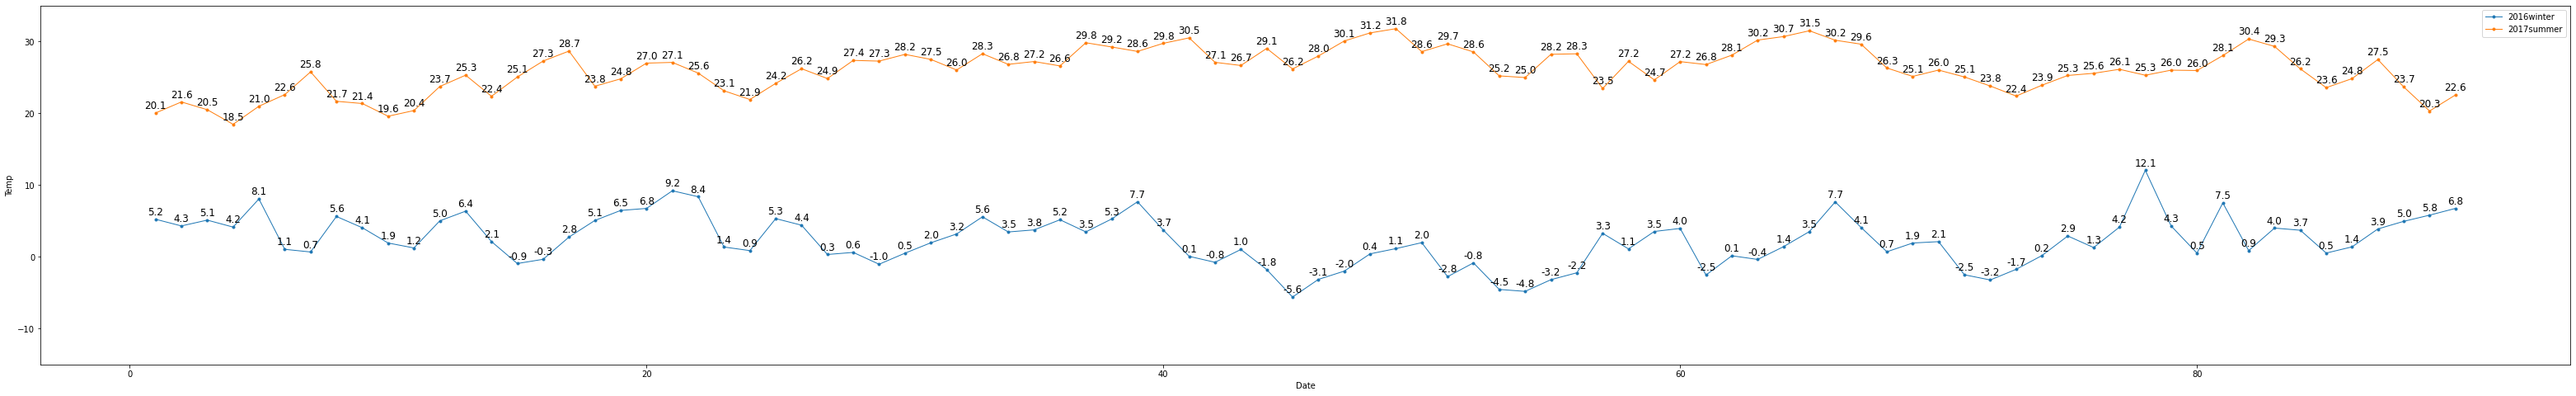

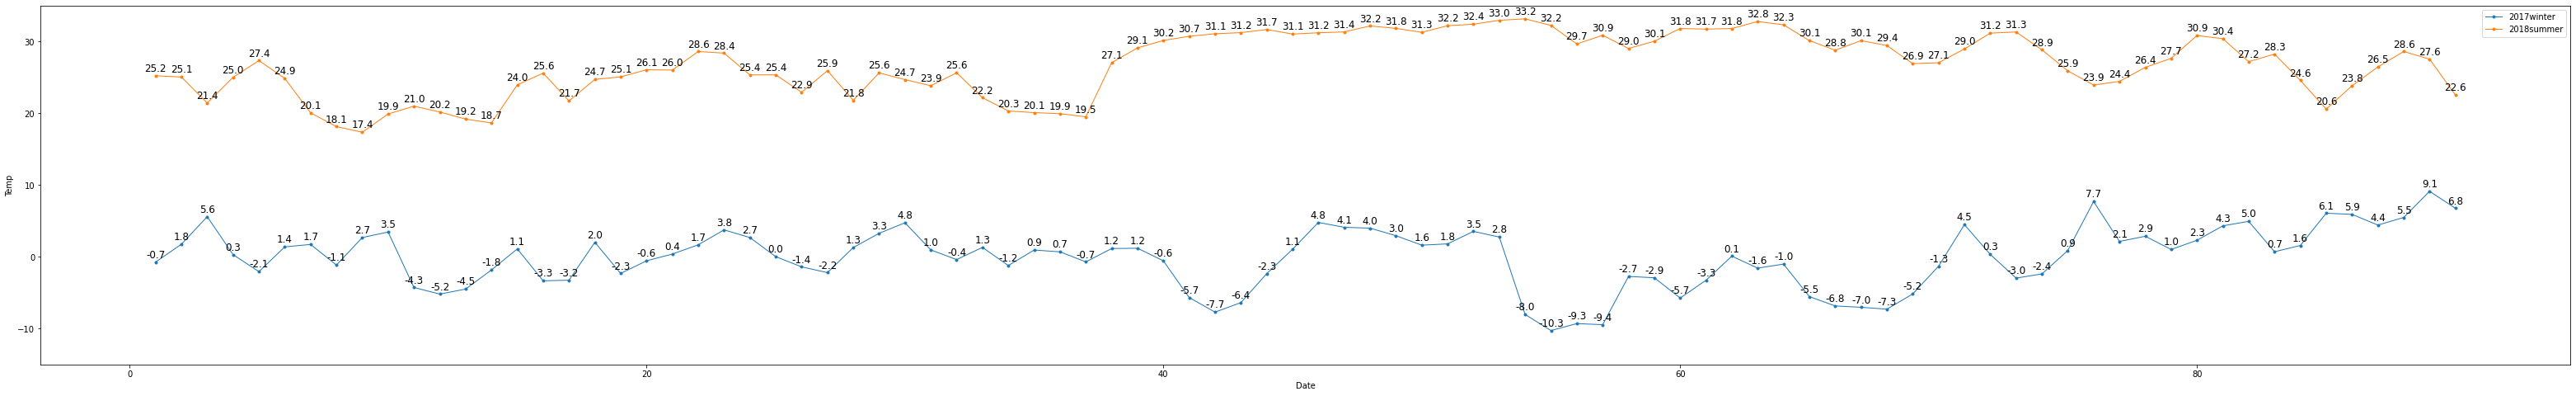

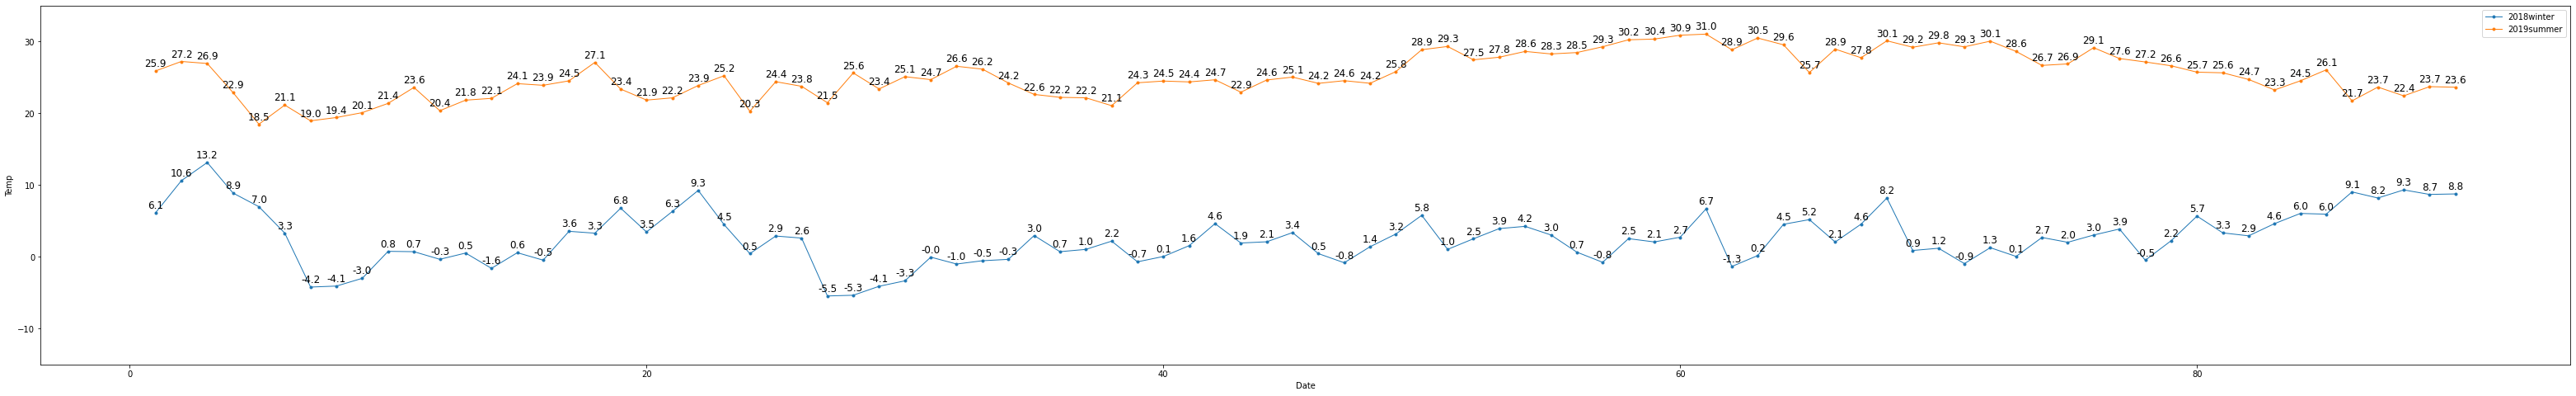

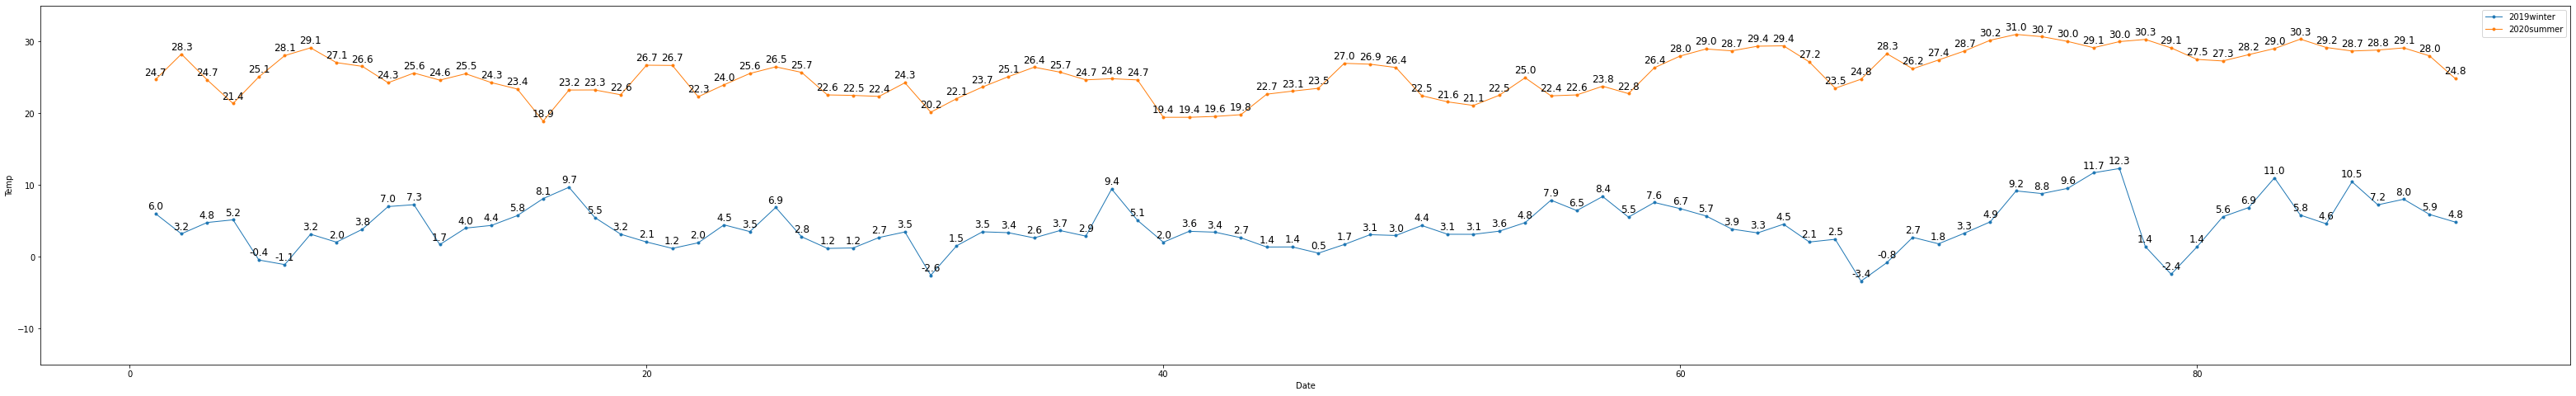

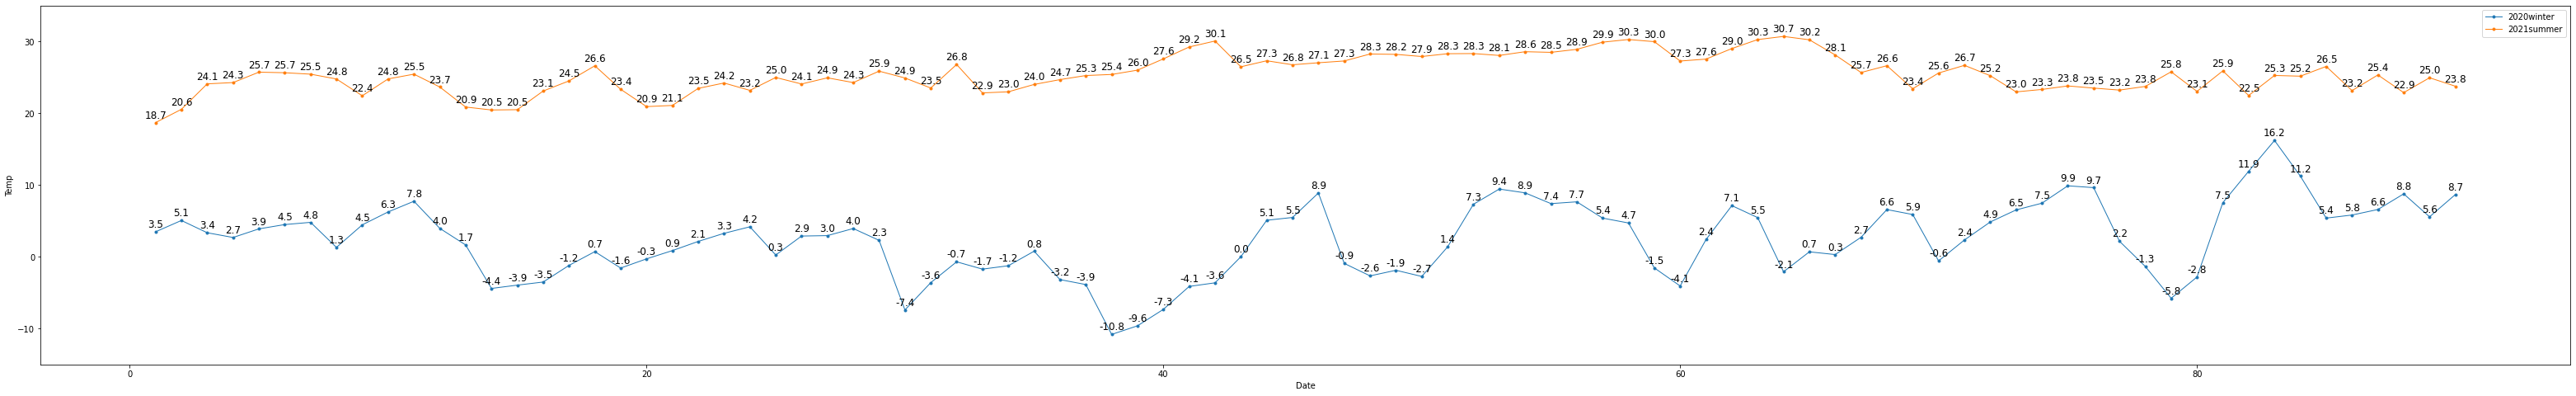

In [31]:
# 2011년부터 10년치의 여름과 겨울의 평균기온 비교 그래프를 보여주고 그림으로 저장
for i in range(2010,2021):
    win_sum_graph(i,i+1)

### 2. X년도의 겨울, (X+1)년도의 여름 HI 그래프

1. 필요한 column 불러오기 및 EDA

In [32]:
# 필요한 열지수 정보만 가져온다.
HI=temp_pre.loc[:,['year','month','day','hour','HI','region']]
HI.head()

,year,month,day,hour,HI,region
0,2010,6,1,0,15.589444,동인동
1,2010,6,1,1,17.245000,동인동
2,2010,6,1,2,18.926667,동인동
3,2010,6,1,3,20.006111,동인동
4,2010,6,1,4,21.415556,동인동


In [33]:
# 폭염의 기준인 체감온도 33도 이상인 시간대만 따로 데이터프레임으로 만듬
index=list(HI[(HI['HI']>=33)].index)
HIGH=HI.loc[index,:]
# HIGH[HIGH['month']==5].count()
HIGH.count()

year      603964
month     603964
day       603964
hour      603964
HI        603964
region    603964
dtype: int64

In [34]:
# 각각의 달에서 HI가 33 이상인 시간대를 세어봄
for i in range(3):
    print('{0}월 총 폭염 시간 수: '.format((i+6))+str(len(HIGH[HIGH['month']==(i+6)]))+'시간',end='\n')

6월 총 폭염 시간 수: 13506시간
7월 총 폭염 시간 수: 261820시간
8월 총 폭염 시간 수: 311003시간


In [35]:
# 2010년부터 2021년 까지 각각의 달에서 HI가 33 이상인 시간대를 세어봄
for j in range(2010,2022):
    temp_HIGH=HIGH[HIGH['year']==j]
    for i in range(3):
        print('{0}년 {1}월 총 폭염 시간 수: '.format(j,(i+6))+str(len(temp_HIGH[temp_HIGH['month']==(i+6)]))+'시간',end='\n')
    print()

2010년 6월 총 폭염 시간 수: 1762시간
2010년 7월 총 폭염 시간 수: 19740시간
2010년 8월 총 폭염 시간 수: 42378시간

2011년 6월 총 폭염 시간 수: 3177시간
2011년 7월 총 폭염 시간 수: 18735시간
2011년 8월 총 폭염 시간 수: 19734시간

2012년 6월 총 폭염 시간 수: 40시간
2012년 7월 총 폭염 시간 수: 22656시간
2012년 8월 총 폭염 시간 수: 25951시간

2013년 6월 총 폭염 시간 수: 1072시간
2013년 7월 총 폭염 시간 수: 33611시간
2013년 8월 총 폭염 시간 수: 39455시간

2014년 6월 총 폭염 시간 수: 105시간
2014년 7월 총 폭염 시간 수: 16945시간
2014년 8월 총 폭염 시간 수: 5070시간

2015년 6월 총 폭염 시간 수: 5시간
2015년 7월 총 폭염 시간 수: 11987시간
2015년 8월 총 폭염 시간 수: 12389시간

2016년 6월 총 폭염 시간 수: 121시간
2016년 7월 총 폭염 시간 수: 17797시간
2016년 8월 총 폭염 시간 수: 32981시간

2017년 6월 총 폭염 시간 수: 1968시간
2017년 7월 총 폭염 시간 수: 31345시간
2017년 8월 총 폭염 시간 수: 21243시간

2018년 6월 총 폭염 시간 수: 1143시간
2018년 7월 총 폭염 시간 수: 48215시간
2018년 8월 총 폭염 시간 수: 34892시간

2019년 6월 총 폭염 시간 수: 301시간
2019년 7월 총 폭염 시간 수: 12623시간
2019년 8월 총 폭염 시간 수: 22858시간

2020년 6월 총 폭염 시간 수: 3528시간
2020년 7월 총 폭염 시간 수: 2780시간
2020년 8월 총 폭염 시간 수: 41096시간

2021년 6월 총 폭염 시간 수: 284시간
2021년 7월 총 폭염 시간 수: 25386시간
2021년 8월 총 폭염 시간 수: 12956시간



2-1. 매년 폭염인 달의 시간대를 시각화 하는 함수

In [36]:
def HI_graph(m,y):
    xs=[str(i+6)+'th month' for i in range(3)]
    ys=y


    plt.figure(figsize=(10,6)) #그래프 크기 지정

    plt.plot(xs,ys,'o-',ms=3,lw=1)
    # plt.xlabel('Month') #그래프 x축 이름(label) 지정
    plt.title('{0}th year summer HI count'.format(m))
    plt.ylabel('HI')
    plt.ylim(0,50000)
    # plt.legend()

    for i in range(len(xs)):
        height=ys[i]
        plt.text(xs[i],height+0.25,'%.f hour'%height,ha='center',va='bottom',size=12)

    # plt.savefig(str(j)+'년도 여름 열지수')

2-2. 매년 폭염인 달의 시간대를 시각화 하는 코드

In [37]:
for j in range(2010,2022):
    HI_temp=[]
    temp_HIGH=HIGH[HIGH['year']==j]
    # print('{0}년 폭염 시간 수: '.format(j))
    for i in range(3):
        HI_temp.append(len(temp_HIGH[temp_HIGH['month']==(i+6)]))
    # HI_graph(j,HI_temp)
    # print(HI_temp)
    # print()

3-1. HI가 -10 이하인 한파인 시간대를 찾아봄

In [38]:
# 한파인 날을 따로 모은 데이터프레임을 만든다
index=list(HI[(HI['HI']<=-10)].index)
LOW=HI.loc[index,:]
# LOW[LOW['month']==1].count()
LOW.count()

year      27080
month     27080
day       27080
hour      27080
HI        27080
region    27080
dtype: int64

In [39]:
# 한파인 시간대가 있는 달을 찾아봄
LOW['month'].unique()

array([ 1,  2, 12], dtype=int64)

In [40]:
# 월별로 한파인 시간대를 세어봄
for i in range(1):
    print('{0}월 총 한파 시간 수: '.format((i+12))+str(len(LOW[LOW['month']==(i+12)]))+'시간',end='\n')

for i in range(2):
    print('{0}월 총 한파 시간 수: '.format((i+1))+str(len(LOW[LOW['month']==(i+1)]))+'시간',end='\n')

12월 총 한파 시간 수: 2069시간
1월 총 한파 시간 수: 19087시간
2월 총 한파 시간 수: 5924시간


In [41]:
for j in range(2010,2022):
    temp_LOW=LOW[LOW['year']==j]
    for i in range(1):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+12))+str(len(temp_LOW[temp_LOW['month']==(i+12)]))+'시간',end='\n')
    for i in range(2):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+1))+str(len(temp_LOW[temp_LOW['month']==(i+1)]))+'시간',end='\n')
    print()

2010년 12월 총 한파 시간 수: 293시간
2010년 1월 총 한파 시간 수: 0시간
2010년 2월 총 한파 시간 수: 0시간

2011년 12월 총 한파 시간 수: 0시간
2011년 1월 총 한파 시간 수: 2597시간
2011년 2월 총 한파 시간 수: 0시간

2012년 12월 총 한파 시간 수: 796시간
2012년 1월 총 한파 시간 수: 144시간
2012년 2월 총 한파 시간 수: 2260시간

2013년 12월 총 한파 시간 수: 0시간
2013년 1월 총 한파 시간 수: 1765시간
2013년 2월 총 한파 시간 수: 1453시간

2014년 12월 총 한파 시간 수: 0시간
2014년 1월 총 한파 시간 수: 0시간
2014년 2월 총 한파 시간 수: 0시간

2015년 12월 총 한파 시간 수: 0시간
2015년 1월 총 한파 시간 수: 5시간
2015년 2월 총 한파 시간 수: 65시간

2016년 12월 총 한파 시간 수: 0시간
2016년 1월 총 한파 시간 수: 3159시간
2016년 2월 총 한파 시간 수: 0시간

2017년 12월 총 한파 시간 수: 153시간
2017년 1월 총 한파 시간 수: 22시간
2017년 2월 총 한파 시간 수: 0시간

2018년 12월 총 한파 시간 수: 11시간
2018년 1월 총 한파 시간 수: 7209시간
2018년 2월 총 한파 시간 수: 2127시간

2019년 12월 총 한파 시간 수: 0시간
2019년 1월 총 한파 시간 수: 0시간
2019년 2월 총 한파 시간 수: 0시간

2020년 12월 총 한파 시간 수: 258시간
2020년 1월 총 한파 시간 수: 0시간
2020년 2월 총 한파 시간 수: 0시간

2021년 12월 총 한파 시간 수: 558시간
2021년 1월 총 한파 시간 수: 4170시간
2021년 2월 총 한파 시간 수: 0시간



3-2. X년의 한파시간대와 (X+1)년의 폭염 시간대를 비교하여 시각화 하는 함수

In [42]:
# 시각화 한 후 저장까지 함
def HI_graph(m,H,L):
    xs=[1,2,3]
    y1=H
    y2=L


    fig,ax1=plt.subplots(figsize=(15,6))
    ax1.set_ylabel('Heat Wave')
    ax1.set_xticks([1,2,3])
    ax1.set_ylim([0,50000])
    ax1.set_title(str(m+1)+' year Heat_Index comparision',size=24,family='fantasy')
    line1=ax1.plot(xs,y1,color='red',label=str(m+1)+' Summer')

    ax2=ax1.twinx()
    ax2.set_ylabel('Cold Wave')
    ax2.set_ylim([0,7500])
    line2=ax2.plot(xs,y2,color='blue',label=str(m)+' Winter')

    lines=line1+line2
    labels=[l.get_label() for l in lines]
    prop = dict(
        # family='fantasy', # 글씨체
        style='italic', # 글씨 형식 - 이탤릭형식
        size=18 # 글씨 크기
    )
    
    config_legend=dict(## 범례 설정
        loc='upper left', # 범례 위치 설정
        prop=prop # 범례 폰트 속성
    )
    ax1.legend(lines,labels,**config_legend)

    for i in range(len(xs)):
        height=y1[i]
        ax1.text(xs[i],height+0.7,'%.f hour'%height,ha='center',va='bottom',size=12)
            
    for i in range(len(xs)):
        height=y2[i]
        ax2.text(xs[i],height+0.15,'%.f hour'%height,ha='center',va='bottom',size=12)

    plt.savefig(str(m)+'년도 겨울과 여름의 열지수')

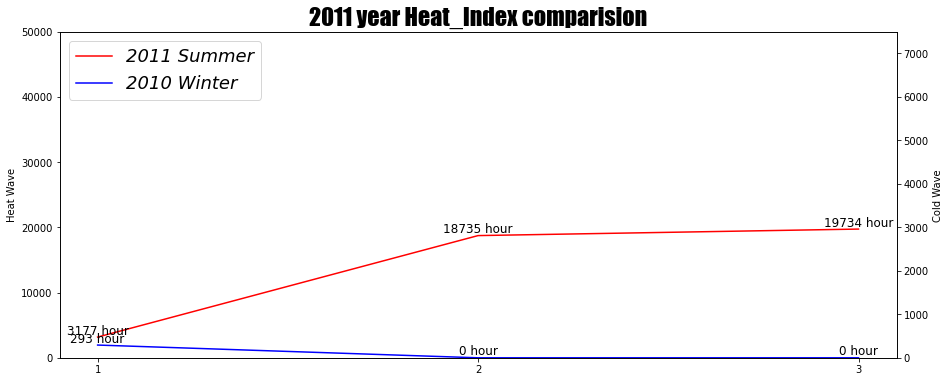

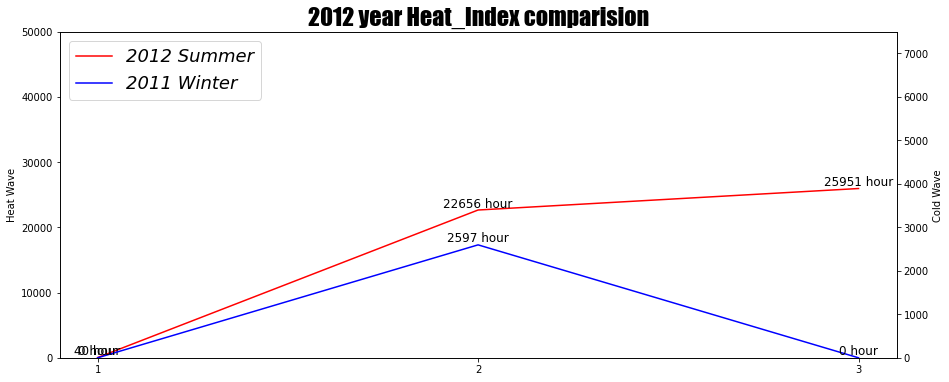

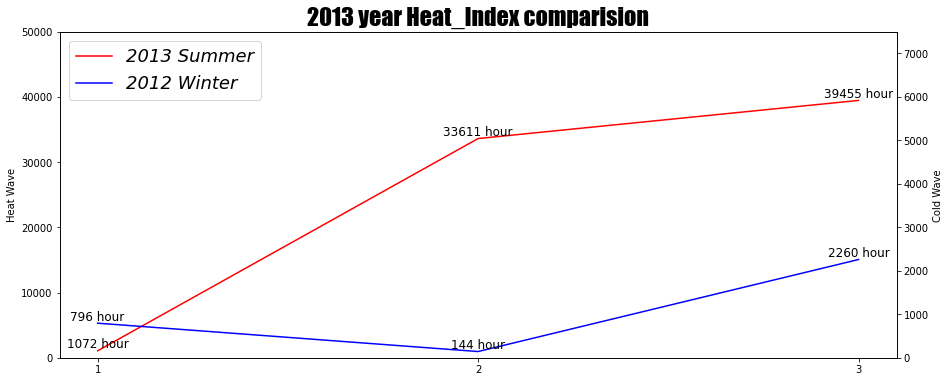

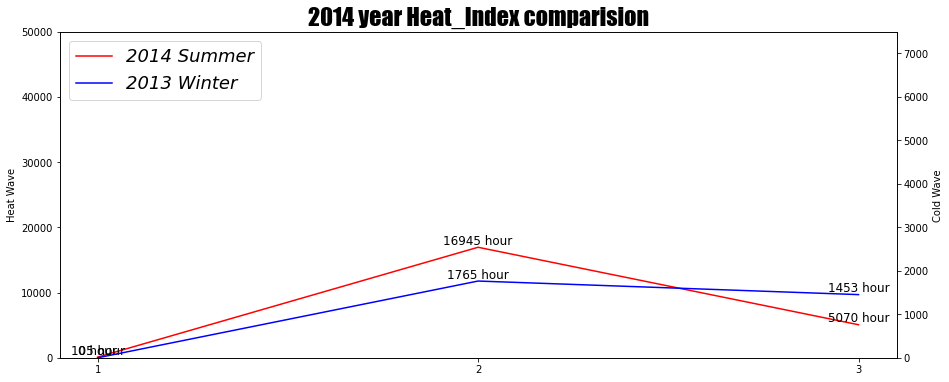

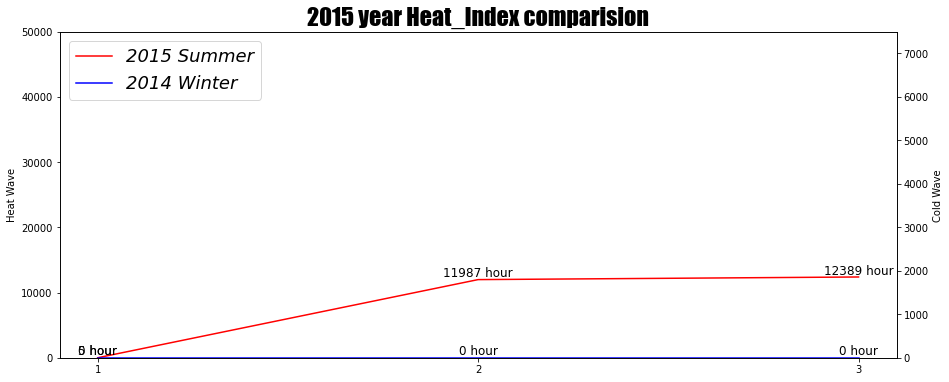

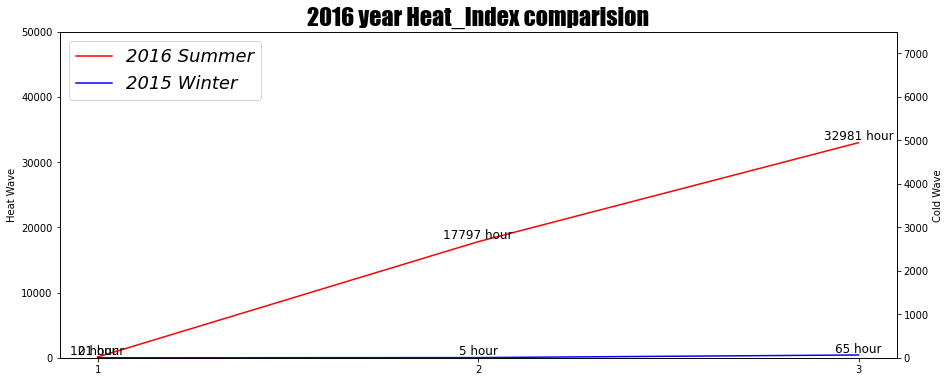

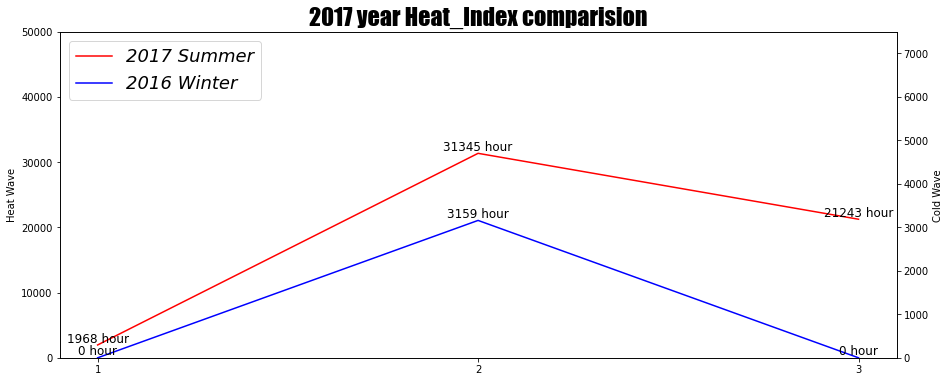

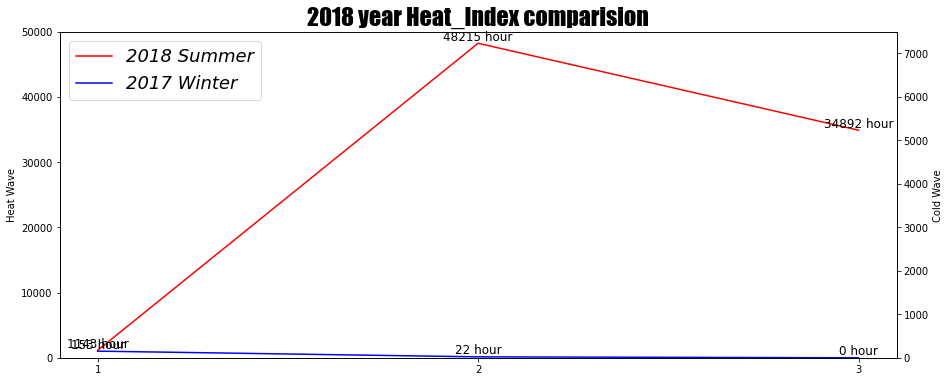

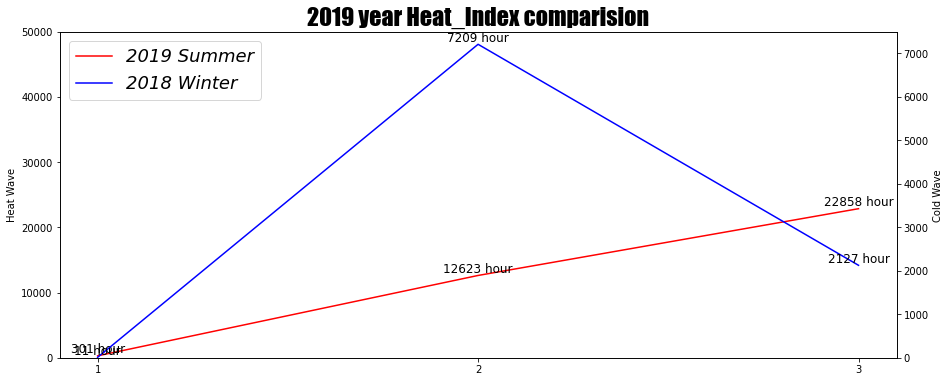

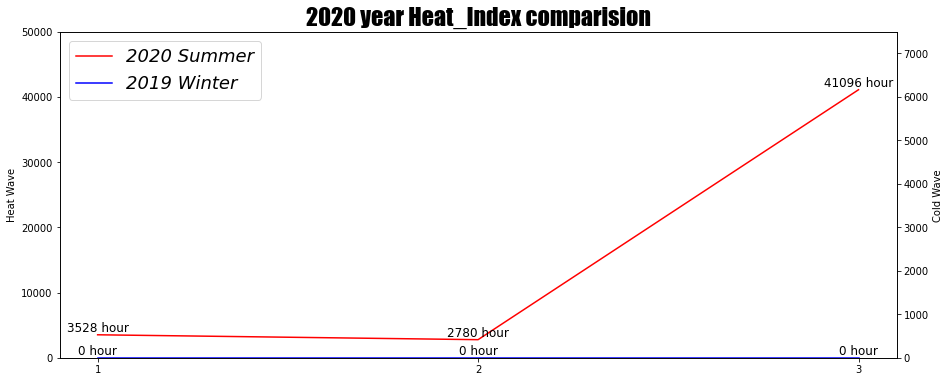

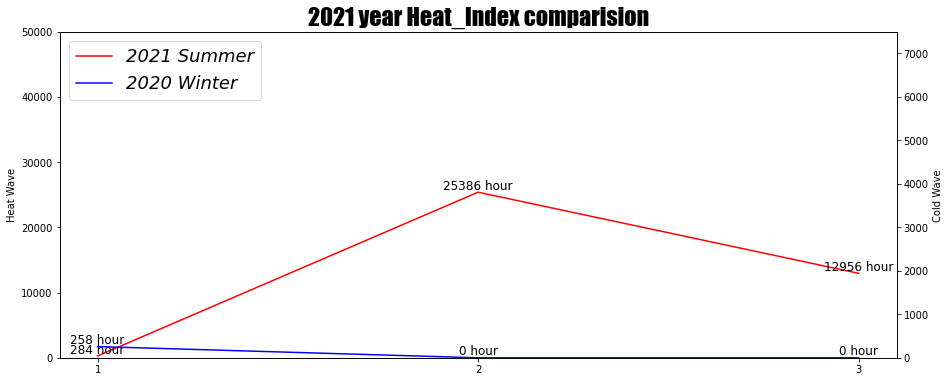

In [43]:
# 2011년 부터 2021년까지를 비교하여 시각화한 것을 저장하는 코드
for j in range(2010,2021):
    temp_HIGH=HIGH[HIGH['year']==j+1]
    summer_high=[]
    for i in range(3):
        summer_high.append(len(temp_HIGH[temp_HIGH['month']==(i+6)]))

    temp_LOW=LOW[LOW['year']==j]
    winter_low=[]
    for i in range(1):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+12)]))
    for i in range(2):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+1)]))
    
    HI_graph(j,summer_high,winter_low)